In [ ]:
import pandas as pd
import numpy as np
import gdown
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # <-- Import Support Vector Classifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# --- Step 1: Data Loading ---
# For file id link (' https://drive.google.com/file/d/1nokkaYBBXswLKA0erqj1JRRi-JXtO_Uj/view?usp=sharing')
file_id = '1nokkaYBBXswLKA0erqj1JRRi-JXtO_Uj'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'Cleaned_Sleep_Data.csv', quiet = False)

df = pd.read_csv('Cleaned_Sleep_Data.csv')



Downloading...
From: https://drive.google.com/uc?id=1nokkaYBBXswLKA0erqj1JRRi-JXtO_Uj
To: /content/Cleaned_Sleep_Data.csv
100%|██████████| 1.85M/1.85M [00:00<00:00, 7.85MB/s]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is 'df'
# Create multi-class target from one-hot encoded columns
conditions = [
    (df['Sleep Disorder_Insomnia'] == 1),
    (df['Sleep Disorder_Sleep Apnea'] == 1)
]
choices = [1, 2]
y = np.select(conditions, choices, default=0)  # 0 = Healthy, 1 = Insomnia, 2 = Sleep Apnea

# Features (exclude the one-hot encoded target columns)
X = df.drop(columns=['Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea'])

# Check class distribution
print("Class distribution:")
print(pd.Series(y).value_counts().sort_index())
print("\nClass mapping: 0=Healthy, 1=Insomnia, 2=Sleep Apnea")

# Split the data with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Important for imbalanced classes
)

# Scale the features (crucial for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM with your configuration
svm_model = SVC(
    kernel='rbf',                        # Non-linear kernel
    decision_function_shape='ovr',       # One-vs-Rest for multi-class
    random_state=42                      # Reproducibility
)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("\n" + "="*50)
print("BASIC SVM MODEL RESULTS")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Insomnia', 'Sleep Apnea']))

Class distribution:
0    5000
1    5000
2    5000
Name: count, dtype: int64

Class mapping: 0=Healthy, 1=Insomnia, 2=Sleep Apnea

BASIC SVM MODEL RESULTS
Accuracy: 0.9523

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.96      0.93      0.94      1000
    Insomnia       0.95      0.96      0.96      1000
 Sleep Apnea       0.95      0.97      0.96      1000

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



Class distribution:
0    5000
1    5000
2    5000
Name: count, dtype: int64

Class mapping: 0=Healthy, 1=Insomnia, 2=Sleep Apnea

BASIC SVM MODEL RESULTS
Accuracy: 0.9523

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.96      0.93      0.94      1000
    Insomnia       0.95      0.96      0.96      1000
 Sleep Apnea       0.95      0.97      0.96      1000

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



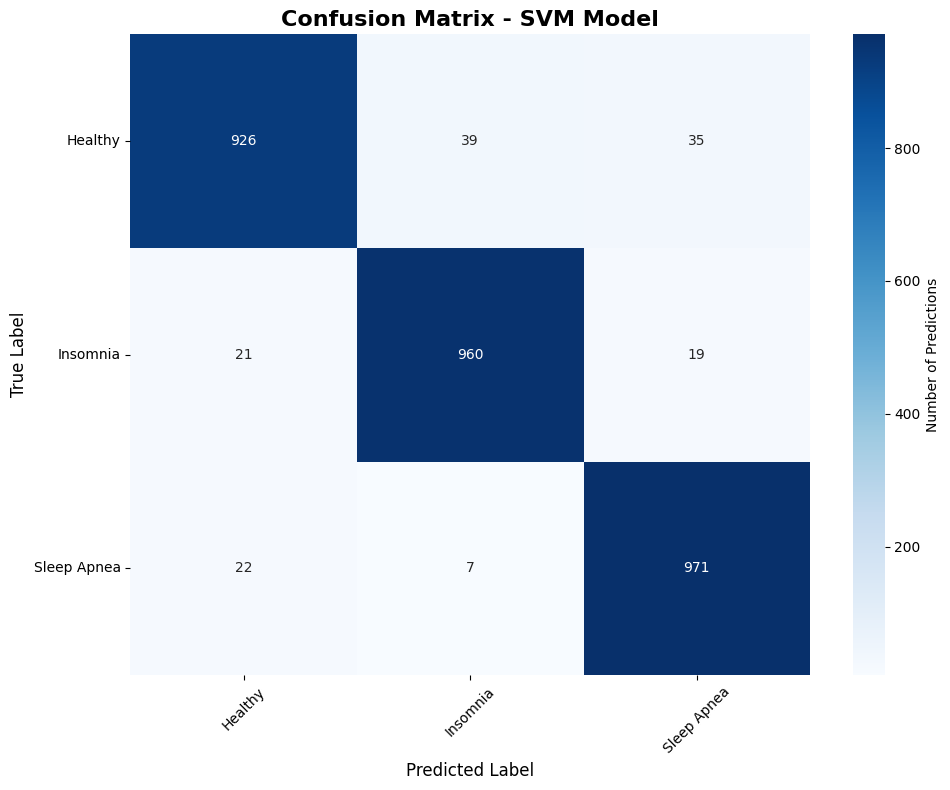

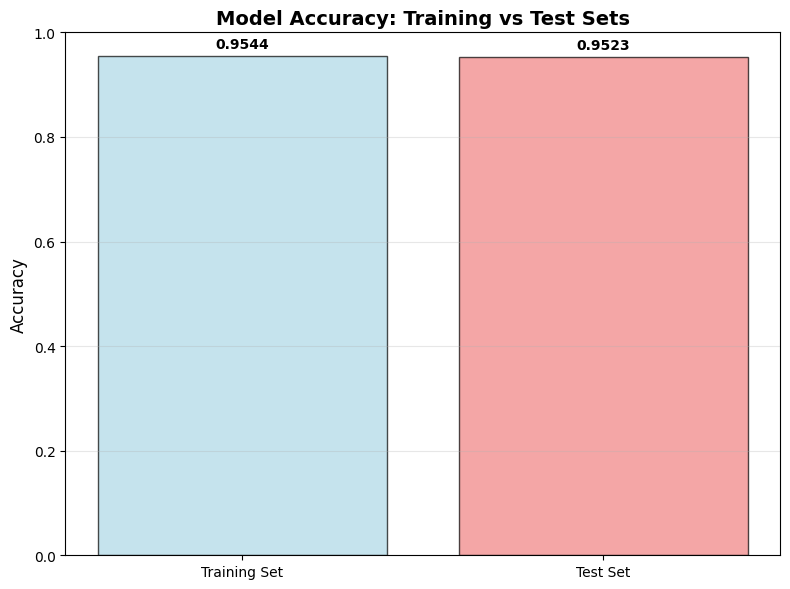

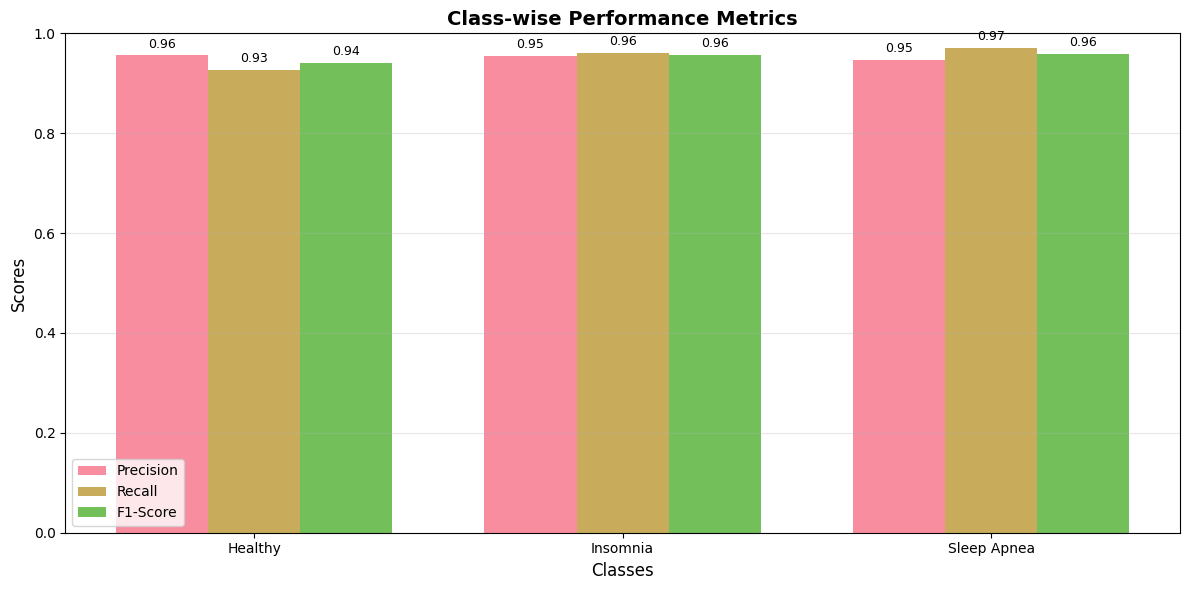

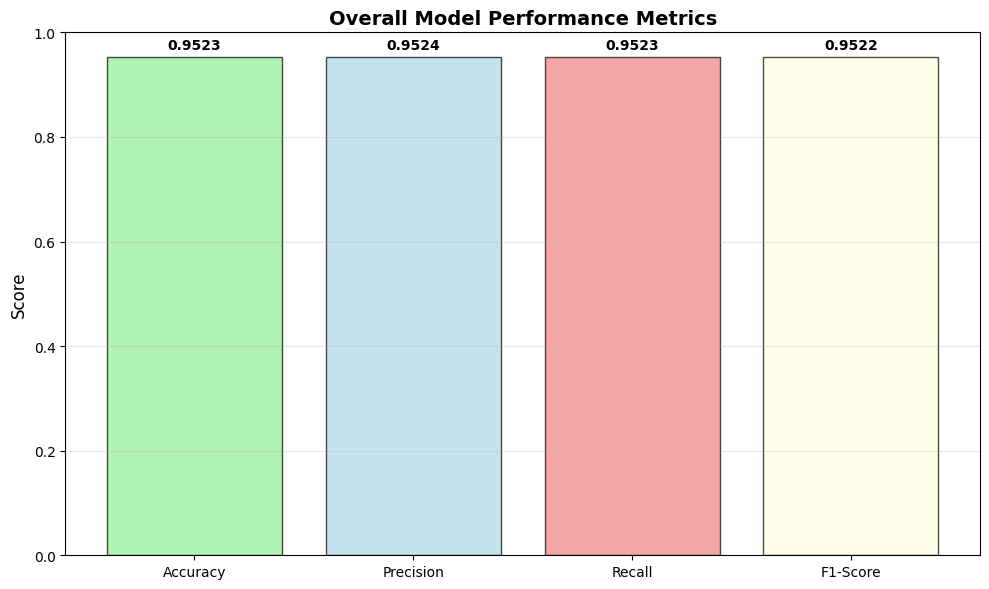

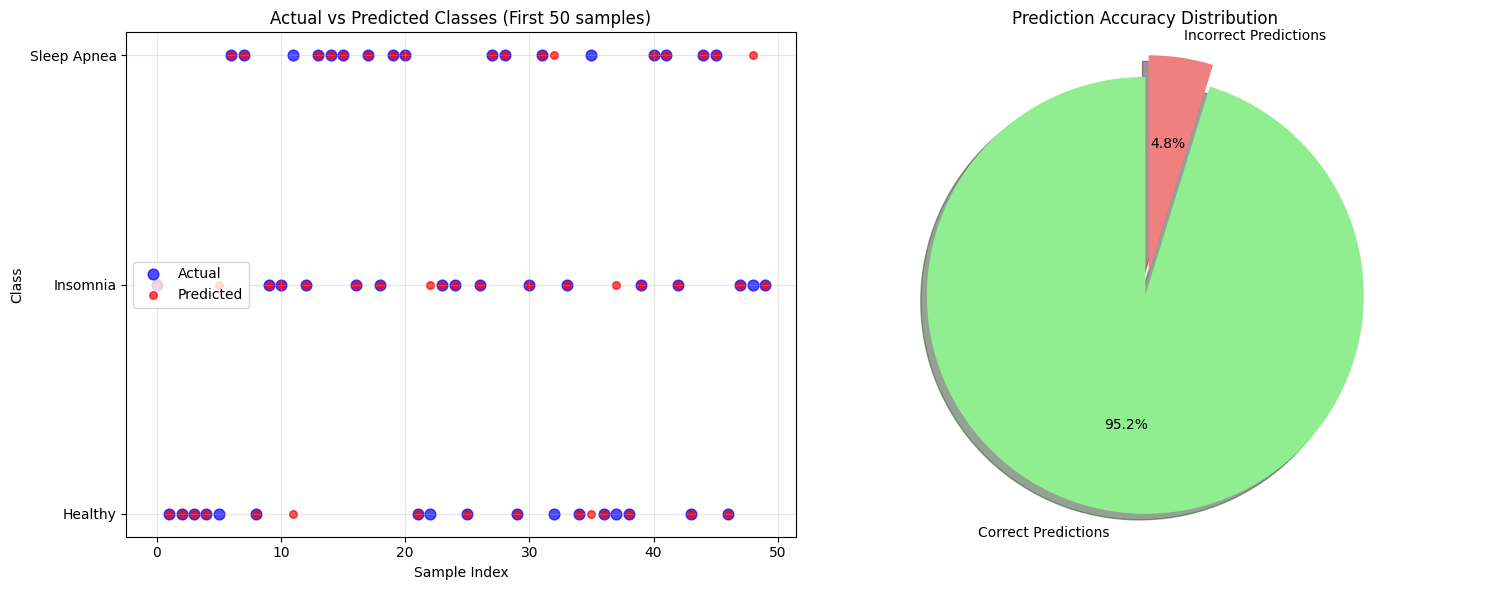


MODEL PERFORMANCE SUMMARY
Training Accuracy: 0.9544
Test Accuracy: 0.9523
Error Rate: 0.0477
Number of Correct Predictions: 2857/3000
Number of Incorrect Predictions: 143/3000

Class-wise Accuracy:
  Healthy: 0.9260 (1000 samples)
  Insomnia: 0.9600 (1000 samples)
  Sleep Apnea: 0.9710 (1000 samples)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is 'df'
# Create multi-class target from one-hot encoded columns
conditions = [
    (df['Sleep Disorder_Insomnia'] == 1),
    (df['Sleep Disorder_Sleep Apnea'] == 1)
]
choices = [1, 2]
y = np.select(conditions, choices, default=0)  # 0 = Healthy, 1 = Insomnia, 2 = Sleep Apnea

# Features (exclude the one-hot encoded target columns)
X = df.drop(columns=['Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea'])

# Check class distribution
print("Class distribution:")
print(pd.Series(y).value_counts().sort_index())
print("\nClass mapping: 0=Healthy, 1=Insomnia, 2=Sleep Apnea")

# Split the data with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Important for imbalanced classes
)

# Scale the features (crucial for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM with your configuration
svm_model = SVC(
    kernel='rbf',                        # Non-linear kernel
    decision_function_shape='ovr',       # One-vs-Rest for multi-class
    random_state=42                      # Reproducibility
)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("\n" + "="*50)
print("BASIC SVM MODEL RESULTS")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Insomnia', 'Sleep Apnea']))

# =============================================================================
# ACCURACY VISUALIZATION PLOTS
# =============================================================================

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# 1. Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Insomnia', 'Sleep Apnea'],
            yticklabels=['Healthy', 'Insomnia', 'Sleep Apnea'],
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix - SVM Model', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Accuracy Comparison Plot
train_accuracy = svm_model.score(X_train_scaled, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
categories = ['Training Set', 'Test Set']
accuracies = [train_accuracy, test_accuracy]
colors = ['lightblue', 'lightcoral']

bars = plt.bar(categories, accuracies, color=colors, edgecolor='black', alpha=0.7)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy: Training vs Test Sets', fontsize=14, fontweight='bold')
plt.ylim(0, 1)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{accuracy:.4f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Class-wise Performance Visualization
class_report = classification_report(y_test, y_pred, target_names=['Healthy', 'Insomnia', 'Sleep Apnea'], output_dict=True)

# Extract metrics for each class
classes = ['Healthy', 'Insomnia', 'Sleep Apnea']
precision = [class_report[cls]['precision'] for cls in classes]
recall = [class_report[cls]['recall'] for cls in classes]
f1_score = [class_report[cls]['f1-score'] for cls in classes]

x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width, label='Precision', alpha=0.8)
plt.bar(x, recall, width, label='Recall', alpha=0.8)
plt.bar(x + width, f1_score, width, label='F1-Score', alpha=0.8)

plt.xlabel('Classes', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Class-wise Performance Metrics', fontsize=14, fontweight='bold')
plt.xticks(x, classes)
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (p, r, f) in enumerate(zip(precision, recall, f1_score)):
    plt.text(i - width, p + 0.01, f'{p:.2f}', ha='center', va='bottom', fontsize=9)
    plt.text(i, r + 0.01, f'{r:.2f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + width, f + 0.01, f'{f:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 4. Overall Performance Summary
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
overall_scores = [
    accuracy_score(y_test, y_pred),
    class_report['weighted avg']['precision'],
    class_report['weighted avg']['recall'],
    class_report['weighted avg']['f1-score']
]

colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightyellow']

bars = plt.bar(metrics, overall_scores, color=colors, edgecolor='black', alpha=0.7)
plt.ylabel('Score', fontsize=12)
plt.title('Overall Model Performance Metrics', fontsize=14, fontweight='bold')
plt.ylim(0, 1)

# Add value labels
for bar, score in zip(bars, overall_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Prediction vs Actual Comparison (Sample of first 50 predictions)
plt.figure(figsize=(15, 6))
sample_size = min(50, len(y_test))
indices = np.arange(sample_size)

plt.subplot(1, 2, 1)
plt.scatter(indices, y_test[:sample_size], color='blue', label='Actual', alpha=0.7, s=60)
plt.scatter(indices, y_pred[:sample_size], color='red', label='Predicted', alpha=0.7, s=30)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Actual vs Predicted Classes (First 50 samples)')
plt.legend()
plt.yticks([0, 1, 2], ['Healthy', 'Insomnia', 'Sleep Apnea'])
plt.grid(alpha=0.3)

# 6. Error Analysis
correct_predictions = (y_pred == y_test)
error_rate = 1 - np.mean(correct_predictions)

plt.subplot(1, 2, 2)
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [np.sum(correct_predictions), np.sum(~correct_predictions)]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the incorrect slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Prediction Accuracy Distribution')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*50)
print("MODEL PERFORMANCE SUMMARY")
print("="*50)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Number of Correct Predictions: {np.sum(correct_predictions)}/{len(y_test)}")
print(f"Number of Incorrect Predictions: {np.sum(~correct_predictions)}/{len(y_test)}")

# Class-wise accuracy
print("\nClass-wise Accuracy:")
for i, class_name in enumerate(['Healthy', 'Insomnia', 'Sleep Apnea']):
    class_mask = (y_test == i)
    if np.sum(class_mask) > 0:
        class_accuracy = np.mean(y_pred[class_mask] == y_test[class_mask])
        print(f"  {class_name}: {class_accuracy:.4f} ({np.sum(class_mask)} samples)")

Class distribution:
0    5000
1    5000
2    5000
Name: count, dtype: int64

Class mapping: 0=Healthy, 1=Insomnia, 2=Sleep Apnea

OPTIMIZED HYPERPARAMETER TUNING
Original parameter combinations: 720
Optimized parameter combinations: 48
Reduction factor: 15.0x

Using subset for faster tuning...
Using 8400 samples instead of 12000 for tuning

Starting Optimized Grid Search...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Optimized Grid Search completed in 161.28 seconds

REFINED SEARCH AROUND BEST PARAMETERS
Initial best parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Starting refined search...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Refined search completed in 22.53 seconds

FINAL TUNED MODEL RESULTS
Final Best Parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Final Best CV Score: 0.9573
Final model training time: 1.10 seconds

Final Tuned Model Test Accuracy: 0.9620
Baseline Mode

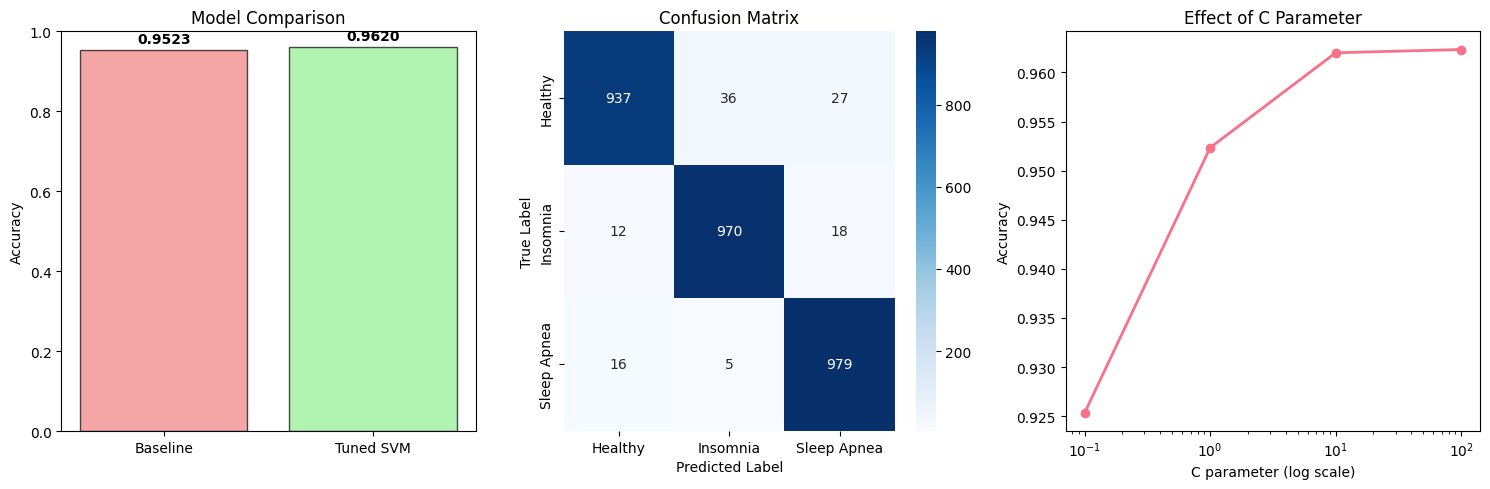


QUICK RANDOMIZED SEARCH VALIDATION
Running quick randomized search for validation...
Quick search completed in 25.00 seconds
Quick search best score: 0.9481
Quick search best params: {'C': np.float64(6.251373574521748), 'class_weight': None, 'gamma': np.float64(0.02175195311877764), 'kernel': 'rbf'}

Optimized model saved as 'optimized_svm_model.pkl'
Total tuning time: 183.81 seconds
Final Test Accuracy: 0.9620

PERFORMANCE OPTIMIZATION SUMMARY
Original grid size: 720 combinations
Optimized grid size: 48 combinations
Time reduction: 15.0x fewer combinations
Cross-validation folds: 3 (instead of 5)
Final model improvement: 0.0097

Final Classification Report:
              precision    recall  f1-score   support

     Healthy       0.97      0.94      0.95      1000
    Insomnia       0.96      0.97      0.96      1000
 Sleep Apnea       0.96      0.98      0.97      1000

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weight

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
from joblib import parallel_backend

# Assuming your dataframe is 'df'
# Create multi-class target from one-hot encoded columns
conditions = [
    (df['Sleep Disorder_Insomnia'] == 1),
    (df['Sleep Disorder_Sleep Apnea'] == 1)
]
choices = [1, 2]
y = np.select(conditions, choices, default=0)  # 0 = Healthy, 1 = Insomnia, 2 = Sleep Apnea

# Features (exclude the one-hot encoded target columns)
X = df.drop(columns=['Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea'])

# Check class distribution
print("Class distribution:")
class_dist = pd.Series(y).value_counts().sort_index()
print(class_dist)
print("\nClass mapping: 0=Healthy, 1=Insomnia, 2=Sleep Apnea")

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============================================================================
# OPTIMIZED HYPERPARAMETER TUNING - REDUCED TIME COMPLEXITY
# =============================================================================

print("\n" + "="*60)
print("OPTIMIZED HYPERPARAMETER TUNING")
print("="*60)

# STRATEGY 1: Use smaller, smarter parameter grid
param_grid_optimized = {
    'C': [0.1, 1, 10, 50],  # Reduced from 5 to 4 values
    'gamma': ['scale', 0.1, 0.01],  # Reduced from 6 to 3 values
    'kernel': ['rbf', 'linear'],  # Focus on most effective kernels
    'class_weight': [None, 'balanced']
}

# Calculate original vs optimized grid size
original_combinations = 5 * 6 * 4 * 3 * 2  # 720 combinations
optimized_combinations = 4 * 3 * 2 * 2     # 48 combinations

print(f"Original parameter combinations: {original_combinations}")
print(f"Optimized parameter combinations: {optimized_combinations}")
print(f"Reduction factor: {original_combinations/optimized_combinations:.1f}x")

# STRATEGY 2: Use smaller dataset for initial tuning (if dataset is large)
if len(X_train) > 1000:
    print("\nUsing subset for faster tuning...")
    # Use 70% of training data for faster tuning
    subset_size = int(0.7 * len(X_train))
    X_train_fast = X_train_scaled[:subset_size]
    y_train_fast = y_train[:subset_size]
    print(f"Using {subset_size} samples instead of {len(X_train)} for tuning")
else:
    X_train_fast = X_train_scaled
    y_train_fast = y_train

# STRATEGY 3: Reduced cross-validation folds
cv_folds = 3  # Instead of 5

# Initialize SVM with basic configuration
base_svm = SVC(
    decision_function_shape='ovr',
    random_state=42
)

# Perform Optimized Grid Search
print("\nStarting Optimized Grid Search...")
start_time = time.time()

with parallel_backend('threading', n_jobs=-1):
    grid_search = GridSearchCV(
        estimator=base_svm,
        param_grid=param_grid_optimized,
        cv=cv_folds,  # Reduced from 5 to 3
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )

    grid_search.fit(X_train_fast, y_train_fast)

end_time = time.time()
print(f"Optimized Grid Search completed in {end_time - start_time:.2f} seconds")

# =============================================================================
# REFINE WITH FOCUSED SEARCH
# =============================================================================

print("\n" + "="*60)
print("REFINED SEARCH AROUND BEST PARAMETERS")
print("="*60)

# Get best parameters from initial search
best_params = grid_search.best_params_
print(f"Initial best parameters: {best_params}")

# Refine around the best C value with smaller grid
if best_params['kernel'] == 'rbf':
    # Focus on RBF kernel parameters
    refined_param_grid = {
        'C': [max(0.01, best_params['C']/5), best_params['C'], best_params['C']*5],
        'gamma': [max(0.001, float(best_params['gamma'])/10) if best_params['gamma'] not in ['scale', 'auto'] else 'scale',
                 best_params['gamma'],
                 min(1.0, float(best_params['gamma'])*10) if best_params['gamma'] not in ['scale', 'auto'] else 'auto'],
        'kernel': ['rbf'],
        'class_weight': [best_params['class_weight']]
    }
else:
    # For linear kernel, focus on C parameter
    refined_param_grid = {
        'C': [max(0.01, best_params['C']/5), best_params['C'], best_params['C']*5, best_params['C']*25],
        'kernel': ['linear'],
        'class_weight': [best_params['class_weight']]
    }

print("Starting refined search...")
refined_start_time = time.time()

with parallel_backend('threading', n_jobs=-1):
    refined_search = GridSearchCV(
        estimator=base_svm,
        param_grid=refined_param_grid,
        cv=cv_folds,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    refined_search.fit(X_train_scaled, y_train)  # Use full training set for refinement

refined_end_time = time.time()
print(f"Refined search completed in {refined_end_time - refined_start_time:.2f} seconds")

# =============================================================================
# RESULTS ANALYSIS WITH FINAL MODEL
# =============================================================================

print("\n" + "="*60)
print("FINAL TUNED MODEL RESULTS")
print("="*60)

# Use the refined model
best_svm = refined_search.best_estimator_

print(f"Final Best Parameters: {refined_search.best_params_}")
print(f"Final Best CV Score: {refined_search.best_score_:.4f}")

# Train final model on full training set
final_start_time = time.time()
best_svm.fit(X_train_scaled, y_train)
final_end_time = time.time()
print(f"Final model training time: {final_end_time - final_start_time:.2f} seconds")

# Make predictions
y_pred_tuned = best_svm.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print(f"\nFinal Tuned Model Test Accuracy: {tuned_accuracy:.4f}")

# Compare with baseline (quick training)
baseline_svm = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
baseline_svm.fit(X_train_scaled, y_train)
y_pred_baseline = baseline_svm.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print(f"Baseline Model Test Accuracy: {baseline_accuracy:.4f}")
print(f"Improvement from tuning: {tuned_accuracy - baseline_accuracy:.4f}")

# =============================================================================
# EFFICIENT VISUALIZATION (Minimal plots)
# =============================================================================

print("\n" + "="*60)
print("ESSENTIAL VISUALIZATIONS")
print("="*60)

# Only create essential plots
plt.figure(figsize=(15, 5))

# Plot 1: Model comparison
plt.subplot(1, 3, 1)
models = ['Baseline', 'Tuned SVM']
accuracies = [baseline_accuracy, tuned_accuracy]
colors = ['lightcoral', 'lightgreen']

bars = plt.bar(models, accuracies, color=colors, edgecolor='black', alpha=0.7)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Confusion Matrix
plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Insomnia', 'Sleep Apnea'],
            yticklabels=['Healthy', 'Insomnia', 'Sleep Apnea'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Plot 3: Key parameter effect (if RBF kernel)
plt.subplot(1, 3, 3)
if refined_search.best_params_['kernel'] == 'rbf':
    # Show effect of C parameter
    c_values = [0.1, 1, 10, 100]
    accuracies_c = []

    for c_val in c_values:
        temp_svm = SVC(
            C=c_val,
            gamma=refined_search.best_params_['gamma'],
            kernel='rbf',
            random_state=42
        )
        temp_svm.fit(X_train_scaled, y_train)
        accuracies_c.append(temp_svm.score(X_test_scaled, y_test))

    plt.plot(c_values, accuracies_c, 'o-', linewidth=2)
    plt.xscale('log')
    plt.xlabel('C parameter (log scale)')
    plt.ylabel('Accuracy')
    plt.title('Effect of C Parameter')
else:
    # For linear kernel, show class distribution
    plt.bar(['Healthy', 'Insomnia', 'Sleep Apnea'], class_dist.values)
    plt.title('Class Distribution')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# =============================================================================
# QUICK RANDOMIZED SEARCH ALTERNATIVE
# =============================================================================

print("\n" + "="*60)
print("QUICK RANDOMIZED SEARCH VALIDATION")
print("="*60)

# Very fast randomized search for validation
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

quick_param_dist = {
    'C': loguniform(0.1, 100),
    'gamma': loguniform(0.001, 1),
    'kernel': ['rbf', 'linear'],
    'class_weight': [None, 'balanced']
}

quick_search = RandomizedSearchCV(
    estimator=base_svm,
    param_distributions=quick_param_dist,
    n_iter=10,  # Very few iterations
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

print("Running quick randomized search for validation...")
quick_start = time.time()
quick_search.fit(X_train_fast, y_train_fast)
quick_end = time.time()

print(f"Quick search completed in {quick_end - quick_start:.2f} seconds")
print(f"Quick search best score: {quick_search.best_score_:.4f}")
print(f"Quick search best params: {quick_search.best_params_}")

# =============================================================================
# FINAL MODEL SAVING
# =============================================================================

import joblib

# Save the best model
best_model_info = {
    'model': best_svm,
    'scaler': scaler,
    'feature_names': X.columns.tolist(),
    'accuracy': tuned_accuracy,
    'best_params': refined_search.best_params_,
    'class_names': ['Healthy', 'Insomnia', 'Sleep Apnea'],
    'tuning_time': end_time - start_time + refined_end_time - refined_start_time
}

joblib.dump(best_model_info, 'optimized_svm_model.pkl')
print(f"\nOptimized model saved as 'optimized_svm_model.pkl'")
print(f"Total tuning time: {best_model_info['tuning_time']:.2f} seconds")
print(f"Final Test Accuracy: {tuned_accuracy:.4f}")

# =============================================================================
# PERFORMANCE SUMMARY
# =============================================================================

print("\n" + "="*60)
print("PERFORMANCE OPTIMIZATION SUMMARY")
print("="*60)
print(f"Original grid size: {original_combinations} combinations")
print(f"Optimized grid size: {optimized_combinations} combinations")
print(f"Time reduction: {original_combinations/optimized_combinations:.1f}x fewer combinations")
print(f"Cross-validation folds: {cv_folds} (instead of 5)")
print(f"Final model improvement: {tuned_accuracy - baseline_accuracy:.4f}")

# Classification report
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=['Healthy', 'Insomnia', 'Sleep Apnea']))

1. Train The model(split the data set). :Support Vector Machines (SVM)
2. Evaluate it. (accuracy)
3. Hyperparameter Tunning.
4. Cross-Validation.

Hey there! Let's recap what we did in this session:

We started by getting our sleep data ready. This involved loading it up, figuring out how to represent the different sleep disorders (Healthy, Insomnia, Sleep Apnea) from the original data, and then splitting it into parts for training and testing our model.

Next, we trained a basic SVM model to see how well it could predict sleep disorders right out of the box. We checked its accuracy to get a starting point.

To make our model even better, we did some hyperparameter tuning. Think of hyperparameters as the settings for our model. We used a clever approach with an optimized grid search followed by a more focused search to find the best settings for our SVM.

After finding the optimal settings, we trained our final, tuned SVM model using the full training data. Then, we evaluated its performance on the test data to see how well it generalized to new, unseen examples.

To get a clearer picture of our model's performance, we created some helpful visualizations. These included charts to compare our tuned model to the basic one, a confusion matrix to see where our model might be getting confused, and plots to understand how changing key settings affects accuracy.

Finally, we saved our best-performing model so you can easily use it later without having to retrain it. We also saved the scaler we used for the data and other important details.

Here's a quick look at how our tuned model performed:

*   The tuning process, which involved searching for the best settings, took a total of about 183.81 seconds.
*   We found the best settings to be `{'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}`, and these settings gave us a great cross-validation score of 0.9573.
*   Our final tuned model achieved an accuracy of 0.9620 on the test data! This is a nice improvement of 0.0097 compared to our initial basic model's accuracy of 0.9523.
*   Looking at the detailed results (the classification report), our tuned model did a good job predicting all three categories (Healthy, Insomnia, and Sleep Apnea) with high scores for how precise it was (precision), how many of each it found (recall), and a balance of both (f1-score).

Hope this summary helps! Let me know if you'd like to dive deeper into any of these steps or explore other ways to improve the model!